In [12]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [13]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [14]:
import json

In [15]:
records = [json.loads(line) for line in open(path, 'rb')]

In [16]:
len(records)

3560

In [18]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [7]:
records[1]['tz']

u'America/Denver'

In [22]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [23]:
len(time_zones)

3440

In [11]:
time_zones[:2]

[u'America/New_York', u'America/Denver']

In [20]:
def get_counts(sequence):
    counts ={}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts = 1
    return counts

In [24]:
counts = get_counts(time_zones)

TypeError: argument of type 'int' is not iterable

In [20]:
from collections import Counter

In [23]:
counts = Counter(time_zones)

In [24]:
len(counts)

97

In [27]:
counts.most_common(5)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191)]

In [8]:
from pandas import DataFrame, Series

In [35]:
!pip install pandas

    100% |████████████████████████████████| 7.3MB 46kB/s 


In [9]:
import pandas as pd

In [25]:
frame = DataFrame(records)

In [26]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 528.4+ KB


In [42]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [27]:
tz_counts = frame['tz'].value_counts()

In [30]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

In [31]:
clean_tz = frame['tz'].fillna('Missing')

In [32]:
clean_tz[clean_tz==''] = 'Unknown'

In [33]:
tz_counts = clean_tz.value_counts()

In [34]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
dtype: int64

In [36]:
%matplotlib inline

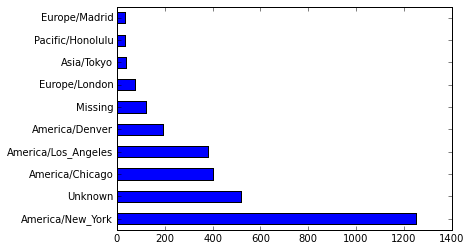

In [37]:
tz_counts[:10].plot(kind='barh', rot=0)

In [40]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [43]:
type(frame)

pandas.core.frame.DataFrame

In [50]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [51]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [54]:
frame['a'][-5:]

3555    Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...
3556    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
3557                               GoogleMaps/RochesterNY
3558                                       GoogleProducer
3559    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
Name: a, dtype: object

In [56]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [57]:
type(results.value_counts())

pandas.core.series.Series

In [58]:
cframe = frame[frame.a.notnull()]

In [60]:
len(frame) - len(cframe)

120

In [61]:
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')

In [64]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [67]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [78]:
for i in by_tz_os:
    for x in i:
        print x

(u'', 'Not Windows')
      _heartbeat_                                                  a  \
8             NaN  Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...   
28            NaN  Mozilla/5.0 (iPad; CPU OS 5_0_1 like Mac OS X)...   
29            NaN  Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X...   
46            NaN  BlackBerry8520/5.0.0.592 Profile/MIDP-2.1 Conf...   
57            NaN  Mozilla/5.0 (iPhone; U; CPU iPhone OS 5_0_1 li...   
71            NaN  Mozilla/5.0 (iPhone; CPU iPhone OS 5_1 like Ma...   
75            NaN  Mozilla/5.0 (iPhone; CPU iPhone OS 5_0_1 like ...   
83            NaN  Mozilla/5.0 (iPhone; U; CPU iPhone OS 5_1 like...   
87            NaN  Mozilla/5.0 (iPhone; U; CPU iPhone OS 5_1 like...   
118           NaN  Mozilla/5.0 (iPad; CPU OS 5_0_1 like Mac OS X)...   
119           NaN  Mozilla/5.0 (BlackBerry; U; BlackBerry 9330; e...   
208           NaN  Mozilla/5.0 (iPad; CPU OS 5_0_1 like Mac OS X)...   
250           NaN  Mozilla/5.0 (iPhone; CPU

In [79]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [81]:
agg_counts[:7]

Not Windows  Windows
tz                                       
                             245      276
Africa/Cairo                   0        3
Africa/Casablanca              0        1
Africa/Ceuta                   0        2
Africa/Johannesburg            0        1
Africa/Lusaka                  0        1
America/Anchorage              4        1

In [82]:
indexer = agg_counts.sum(1).argsort()

In [83]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [84]:
count_subset = agg_counts.take(indexer)[-10:]

In [85]:
count_subset

Not Windows  Windows
tz                                       
America/Sao_Paulo             13       20
Europe/Madrid                 16       19
Pacific/Honolulu               0       36
Asia/Tokyo                     2       35
Europe/London                 43       31
America/Denver               132       59
America/Los_Angeles          130      252
America/Chicago              115      285
                             245      276
America/New_York             339      912

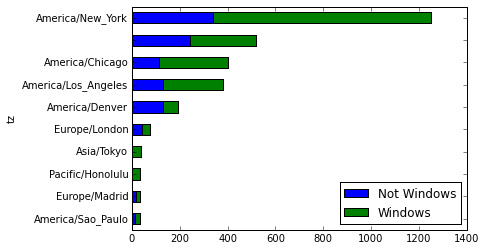

In [88]:
count_subset.plot(kind='barh', stacked=True)

In [89]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

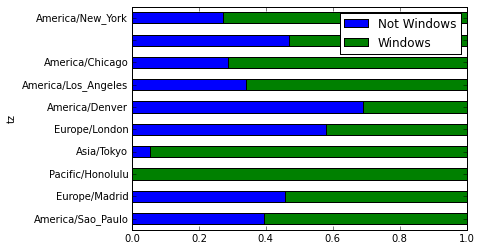

In [90]:
normed_subset.plot(kind='barh', stacked = True)